# Imports

In [7]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt
import os

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [8]:
n = 5 # 5 increase n 
label_name = "stat5"
layers = [11] #[7, 2]

epochs = 1000 # increase epochs until curve flattens
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [9]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [10]:
os.makedirs('models', exist_ok=True)
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 4.882252216339111
Epoch 1, Loss 4.835527181625366
Epoch 2, Loss 4.845115900039673
Epoch 3, Loss 4.843978643417358
Epoch 4, Loss 4.758397817611694
Epoch 5, Loss 4.8455798625946045
Epoch 6, Loss 4.76646614074707
Epoch 7, Loss 4.8505918979644775
Epoch 8, Loss 4.8316285610198975
Epoch 9, Loss 4.840062379837036
Epoch 10, Loss 4.7743330001831055
Epoch 11, Loss 4.86537504196167
Epoch 12, Loss 4.779615879058838
Epoch 13, Loss 4.78905987739563
Epoch 14, Loss 4.847421407699585
Epoch 15, Loss 4.850845813751221
Epoch 16, Loss 4.8186492919921875
Epoch 17, Loss 4.833330392837524
Epoch 18, Loss 4.8360326290130615
Epoch 19, Loss 4.728949069976807
Epoch 20, Loss 4.798646450042725
Epoch 21, Loss 4.774349212646484
Epoch 22, Loss 4.70838737487793
Epoch 23, Loss 4.7751240730285645
Epoch 24, Loss 4.783406019210815
Epoch 25, Loss 4.6888134479522705
Epoch 26, Loss 4.678454875946045
Epoch 27, Loss 4.6957502365112305
Epoch 28, Loss 4.722630739212036
Epoch 29, Loss 4.7347893714904785
Epoch 30, Loss

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

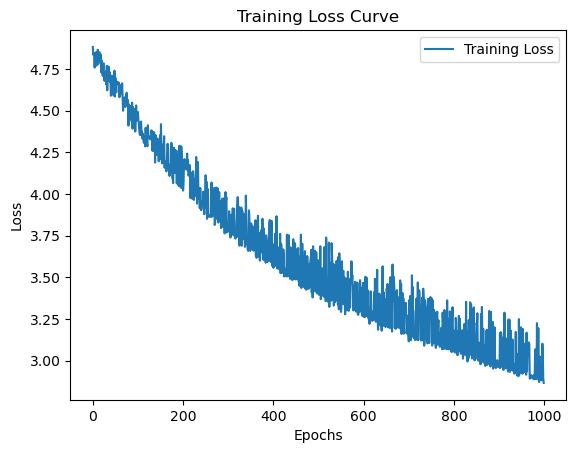

In [11]:
# Create directory for saving figures if it doesn't exist
os.makedirs('figures', exist_ok=True)
# Plot and save the loss curve
plt.figure()
plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.savefig(f'figures/{label_name}_loss_curve.png')
plt.show()

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0], [2, 1, 2, 7, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 4, 2, 2, 1, 1, 2, 0, 1], [2, 0, 1, 2, 1, 5, 2, 1, 2, 0, 1], [0, 0, 0, 0, 0, 3, 4, 1, 3, 4, 0], [1, 0, 0, 0, 0, 0, 0, 0, 8, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Accuracy for class 2 = 42.857142857142854%
Accuracy for class 3 = 53.84615384615385%
Accuracy for class 4 = 14.285714285714286%
Accuracy for class 5 = 29.41176470588235%
Accuracy for class 6 = 26.666666666666668%
Accuracy for class 7 = 0.0%
Accuracy for class 8 = 88.88888888888889%
Accuracy for class 9 = 100.0%
Accuracy for class 10 = 100.0%
Overall accuracy = 40.625%


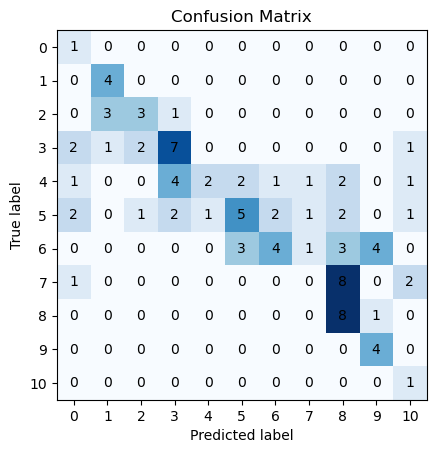

In [12]:
confusion_matrix = evaluate_model(model, training_dataset)
print(confusion_matrix)
confusion_matrix.print_accuracy()
confusion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

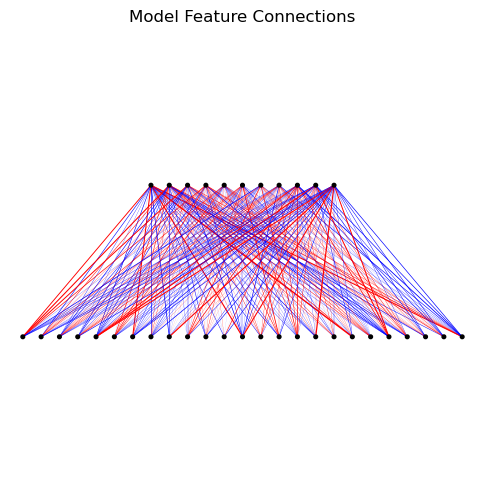

In [13]:
model.plot_connections()

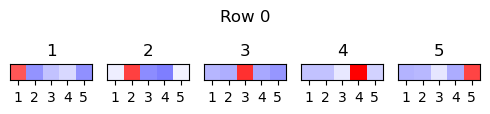

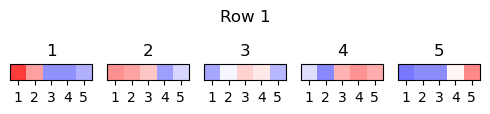

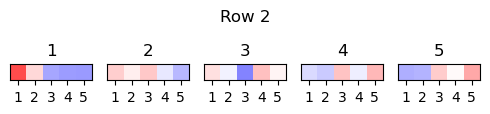

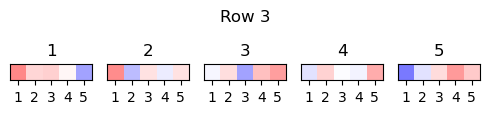

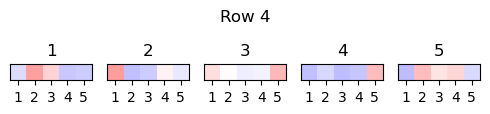

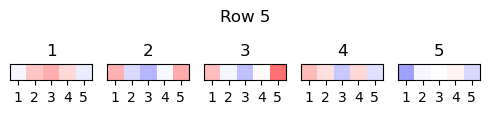

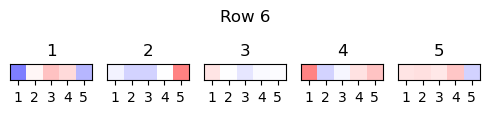

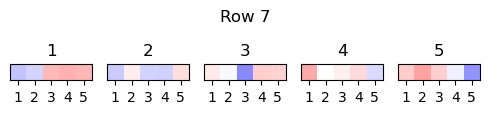

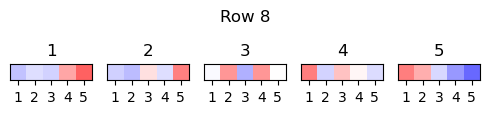

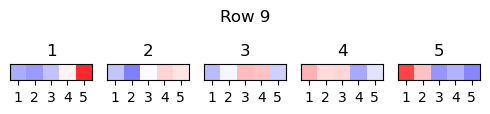

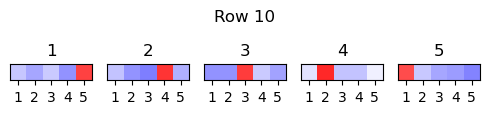

In [14]:
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)
model.plot_heatmap_feature(0,2)
model.plot_heatmap_feature(0,3)
model.plot_heatmap_feature(0,4)
model.plot_heatmap_feature(0,5)
model.plot_heatmap_feature(0,6)
model.plot_heatmap_feature(0,7)
model.plot_heatmap_feature(0,8)
model.plot_heatmap_feature(0,9)
model.plot_heatmap_feature(0,10)

In [15]:
#model.plot_heatmap_feature(1,0)
#model.plot_heatmap_feature(1,1)

#model.plot_heatmap_feature(0,4)

In [16]:
import pandas as pd

# Load the dataset
file_path = f"data/permutations_{n}.csv"  # Update the path accordingly
data = pd.read_csv(file_path)

# Function to calculate the number of inversions in a permutation
def calculate_stat5(permutation):
    inversions = 0
    n = len(permutation)
    for i in range(n):
        for j in range(i + 1, n):
            if permutation[i] > permutation[j]:
                inversions += 1
    return inversions

# Extract permutations and convert them to tuples
data['permutation_tuple'] = data['permutation'].apply(eval)

# Apply the rule to the dataset
data['calculated_stat5'] = data['permutation_tuple'].apply(calculate_stat5)

# Calculate accuracy by comparing calculated_stat5 with actual stat5
accuracy = (data['calculated_stat5'] == data['stat5']).mean()

# Display the accuracy
print("Accuracy:", accuracy)


Accuracy: 1.0
